In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def cubic(X):
    y=0.0001*(X**3+X**2+X+1)
    return y

np.random.seed(3)
X=np.random.normal(0,10,30)
y=cubic(X)
y+=np.random.normal(0,0.25,len(y))
X=X.reshape(-1,1)

X_plot=np.arange(-25,25,0.1)
y_plot=cubic(X_plot)
X_plot=X_plot.reshape(-1,1)

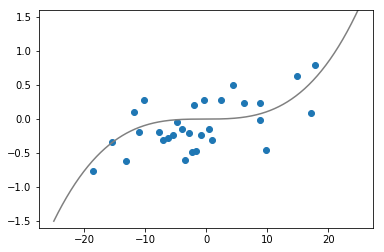

In [4]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='gray')
plt.ylim([-1.6,1.6])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr=LinearRegression()
pol=PolynomialFeatures(degree=7)
X_pol=pol.fit_transform(X)
lr.fit(X_pol,y)
X_plot_pol=pol.fit_transform(X_plot)
y_plot_pol=lr.predict(X_plot_pol)

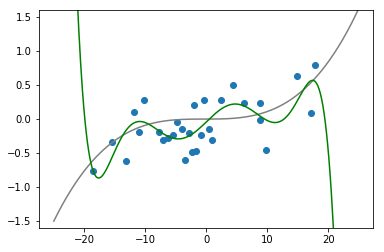

In [10]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='gray')
plt.plot(X_plot,y_plot_pol,color='green')
plt.ylim([-1.6,1.6])
plt.show()

In [13]:
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=1000)
model_ridge.fit(X_pol,y)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

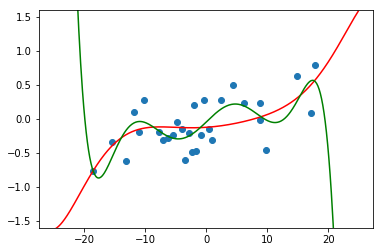

In [16]:
plt.scatter(X,y)
plt.plot(X_plot,model_ridge.predict(X_plot_pol),color='red')
plt.plot(X_plot,y_plot_pol,color='green')
plt.ylim([-1.6,1.6])
plt.show()

In [17]:
lr.coef_

array([  0.00000000e+00,   8.65504973e-02,   4.11571234e-04,
        -1.64948411e-03,  -4.05575048e-06,   9.48940782e-06,
         5.18992808e-09,  -1.49851211e-08])

In [18]:
model_ridge.coef_

array([  0.00000000e+00,   6.00178293e-03,   1.35634933e-03,
         1.14754021e-06,  -5.17185214e-06,   4.16096324e-07,
         5.24302212e-09,  -4.29044302e-10])

In [19]:
from numpy import linalg as LA
LA.norm(lr.coef_)

0.086567192885011676

In [20]:
LA.norm(model_ridge.coef_)

0.0061531382276878762

In [21]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=1000)
model_lasso.fit(X_pol,y)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

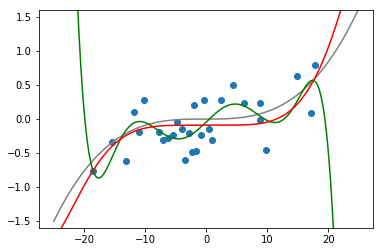

In [26]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='gray')
plt.plot(X_plot,y_plot_pol,color='green')
plt.plot(X_plot,model_lasso.predict(X_plot_pol),color='red')
plt.ylim([-1.6,1.6])
plt.show()

In [27]:
lr.coef_

array([  0.00000000e+00,   8.65504973e-02,   4.11571234e-04,
        -1.64948411e-03,  -4.05575048e-06,   9.48940782e-06,
         5.18992808e-09,  -1.49851211e-08])

In [28]:
model_lasso.coef_

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   4.84889999e-07,
         2.03058492e-09,  -4.20064051e-10])

In [30]:
LA.norm(lr.coef_,ord=1)

0.088625118011573925

In [31]:
LA.norm(model_lasso.coef_,ord=1)

4.8734064792308564e-07

In [33]:
from sklearn.linear_model import ElasticNet
model_en=ElasticNet(alpha=1000,l1_ratio=0.9)
model_en.fit(X_pol,y)

ElasticNet(alpha=1000, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

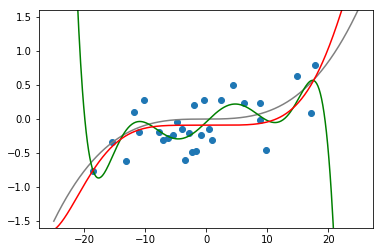

In [37]:
plt.scatter(X,y)
plt.plot(X_plot,y_plot,color='gray')
plt.plot(X_plot,y_plot_pol,color='green')
plt.plot(X_plot,model_en.predict(X_plot_pol),color='red')
plt.ylim([-1.6,1.6])
plt.show()

In [38]:
lr.coef_

array([  0.00000000e+00,   8.65504973e-02,   4.11571234e-04,
        -1.64948411e-03,  -4.05575048e-06,   9.48940782e-06,
         5.18992808e-09,  -1.49851211e-08])

In [39]:
model_en.coef_

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   5.00299266e-07,
         1.98532010e-09,  -4.68508620e-10])

In [40]:
from numpy import linalg as LA
LA.norm(lr.coef_)

0.086567192885011676

In [41]:
LA.norm(model_ridge.coef_)

0.0061531382276878762

In [43]:
LA.norm(lr.coef_,ord=1)

0.088625118011573925

In [44]:
LA.norm(model_lasso.coef_,ord=1)

4.8734064792308564e-07